# Introduction to Image Processing


### Description

An image is represented as a matrix of pixels, where each pixel is a number from 0 to 255 (for a b/w image).

A colored image is composed of three matrices, for Red Green and Blue (RGB). 

In this project we will use `Pillow` (a fork of the Python Image Library) to open an image, which will be represented by a matrix in `numpy`: we can then manipulate in the way we want!\


### Note

This notebook uses [pillow](https://pillow.readthedocs.io/en/latest/).  It should already be installed in your environment, but if not you can install it:
```
! pip install Pillow
```

### References

* http://paulbourke.net/dataformats/bitmaps/

## Step 1: Open and Display

In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np

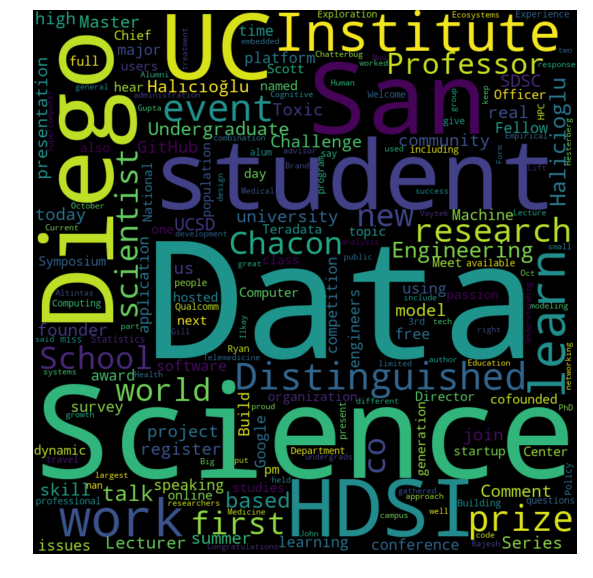

In [2]:
#let's open an image:
image = Image.open("data/HDSI.png")

# and let's visualize it:
display(image)

In [3]:
# that is great, but let's start from the beginning
# let's begin with a BW image, where each pixel is represente dby 1 number
image = Image.open("data/testBW.bmp")
display(image)

In [4]:
# this is too small, let's see its dimensions in pixels
image.size

(8, 4)

In [5]:
# let's just try to plot it larger

# this function prints a larger version of the image!
def printLargeImage(smallImage):
    maxsize = tuple([50*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize, Image.BOX)
    display(largeImage)
    return

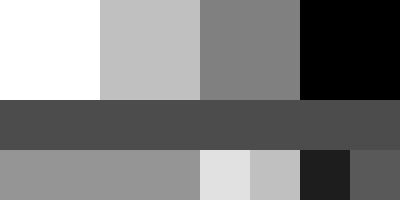

In [6]:
printLargeImage(image)

In [7]:
# now we want to modify the image! 

# first, let's read the image as a numpy array 
im_array = np.array(image)

im_array

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [ 76,  76,  76,  76,  76,  76,  76,  76],
       [149, 149, 149, 149, 225, 192,  29,  89]], dtype=uint8)

[[255 255 192 192 128 128 128 128]
 [255 255 192 192 128 128 128 128]
 [ 76  76  76  76  76  76  76  76]
 [149 149 149 149 225 192  29  89]]


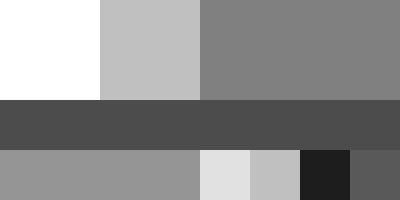

In [8]:
# this looks clear right? every pixel is a number (uint8) with max value 255 (WHITE) and min value 0 (BLACK)

# 1. let's get rid of the big black square on the top right, let's color it of light grey!

# *******************
# YOUR CODE HERE...

im_array_2 = im_array
for i in range(len(im_array_2)):
    for j in range(len(im_array_2[i])):
        if im_array_2[i][j] == 0:
            im_array_2[i][j] = 128
print(im_array_2)
# 
image2 = Image.fromarray(im_array_2)
printLargeImage(image2)

# we can also save it if we want:
# image2.save('data/testBW.bmp')


## Step 2: Image with colors

Ok we have seen how to deal with a small greyscale picture, what about colors?

In [9]:
# let's look at an image with colors
image = Image.open("data/test.bmp")
display(image)

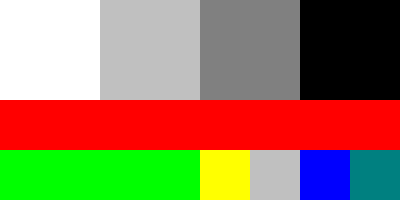

In [10]:
printLargeImage(image)

In [11]:
# let's look at how is the image in numpy
im_array = np.array(image)
im_array

array([[[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [192, 192, 192],
        [  0,   0, 255],
        [  0, 128, 128]]], dtype=uint8)

In [12]:
#umm, it has three dimensions now

#let's try to see the same format as before:
im_array[:,:,0]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 192,   0,   0]], dtype=uint8)

In [13]:
im_array[:,:,1]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 192,   0, 128]], dtype=uint8)

In [14]:
im_array[:,:,2]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 192, 255, 128]], dtype=uint8)

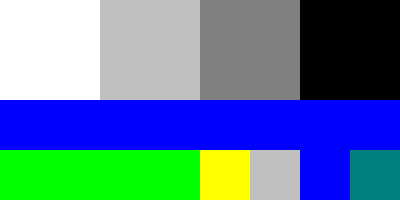

In [15]:
# we have just visualized the three planes of the image! 
# these are referred to RGB:
# Red: im_array[:,:,0] 
# Green: im_array[:,:,1] 
# Blue: im_array[:,:,2] 

# 2. let's get read of the red line in the figure, 
# and let's make it a solid blue!

# *******************
# YOUR CODE HERE...
for i in range(len(im_array[:, :, 0][2])):
    im_array[:, :, 0][2][i] = 0
    im_array[:, :, 2][2][i] = 255
modified_image = Image.fromarray(im_array)
printLargeImage(modified_image)

## Step 3: Crop, rotate, change colors!

If you are interested, you can review [Pillow documentation](https://pillow.readthedocs.io/en/latest/).  There are lots of fun things like making thumbnails, rotating, filters, cropping, layering, etc. This is an easy tutorial with some code ready to be used: [Pillow Tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html).

Original:


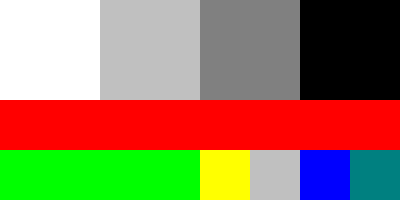

In [16]:
# as an example, let's try with our first small image

print('Original:')
printLargeImage(image)

Image cropped:


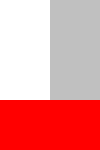

In [17]:
# crop the image:
box = (1, 0, 3, 3) # coordinates: (left, top, right, bottom)
image_cropped = image.crop(box)
print('Image cropped:')
printLargeImage(image_cropped)

In [18]:
import copy

Rotating the cropped:


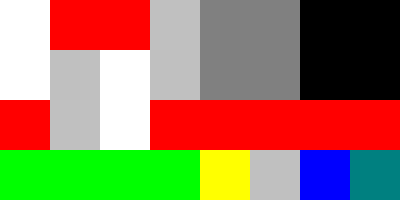

In [19]:
# rotate part of the image!
image_cropped = image_cropped.transpose(Image.ROTATE_180)
image2 = copy.deepcopy(image)
image2.paste(image_cropped, box)
print('Rotating the cropped:')
printLargeImage(image2)

Color messed up:


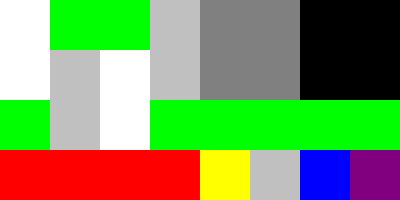

In [20]:
# let's mess up the image: I want to change the color intensity, swapping red and green
r, g, b = image2.split()
temp = Image.merge("RGB", (g, r, b))
print('Color messed up:')
printLargeImage(temp)

Original Image:


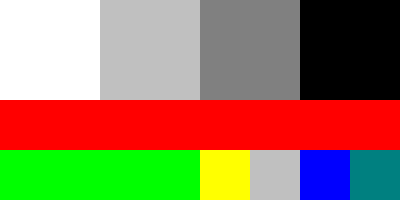

Image Dark:


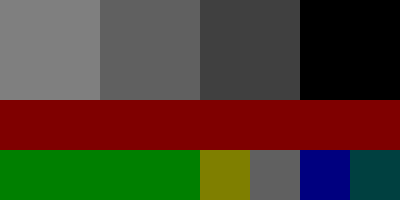

In [21]:
# the function before was not super useful... let's make the colors look darker!
im_array = np.array(image)

im_array_dark = im_array/2 # I make all colors much closer to black
im_array_dark = im_array_dark.astype('uint8') # each pixel still needs to be between 0 and 255 (PAY ATTENTION TO IT)

imageDark = Image.fromarray(im_array_dark)

print('Original Image:')
printLargeImage(image)

print('Image Dark:')
printLargeImage(imageDark)

## Step 4: Fix the Bear Image!

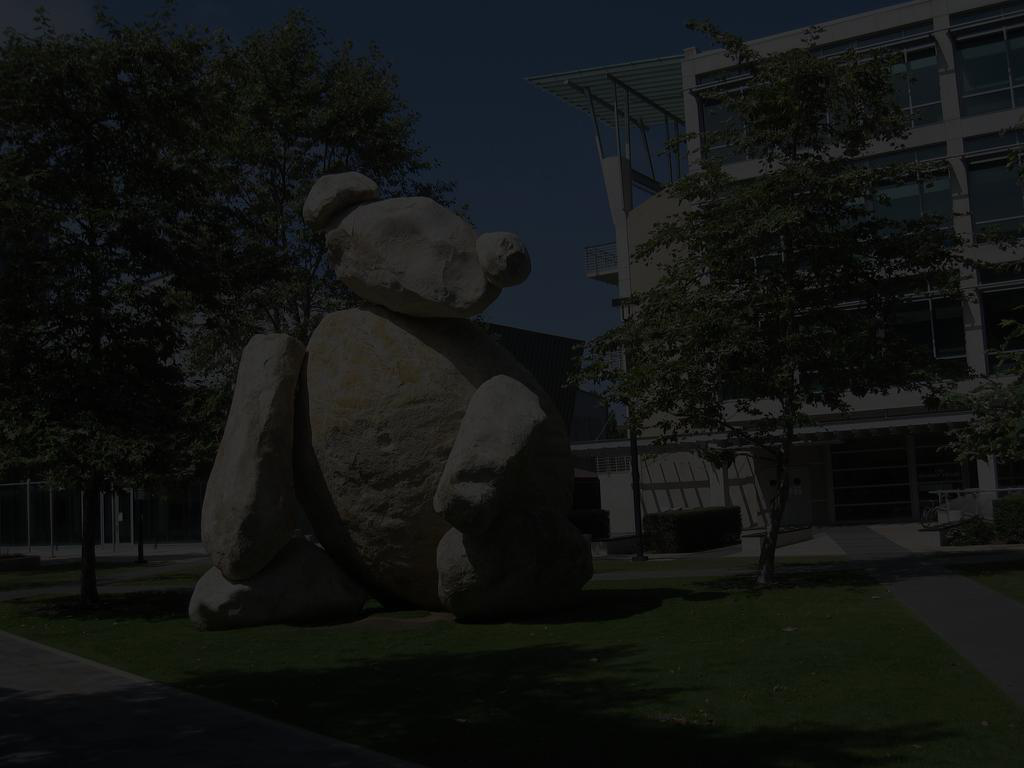

In [23]:
# Let's fix the bear image
bear = Image.open('data/bear.jpg')
display(bear)

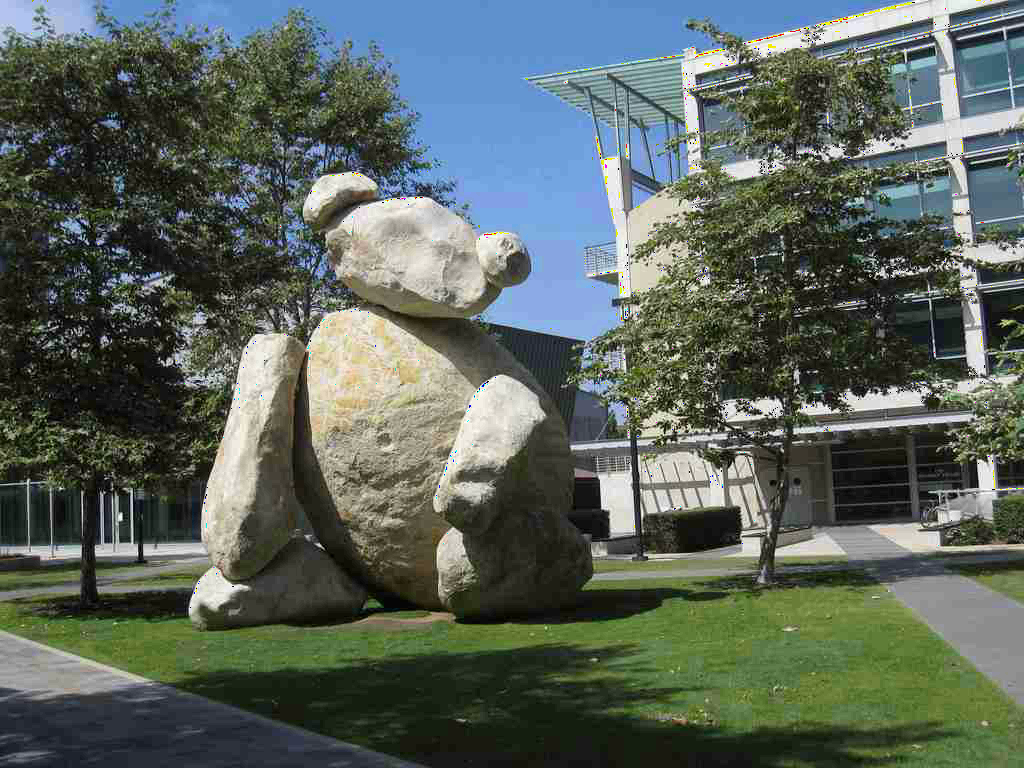

In [74]:
# 4.1 We need to make the bear image look... good!

# use all the tools you learned before

# remember: each pixel MUST be of type 'uint8' with max value 255

# *******************
# YOUR CODE HERE...  

bearArr = np.array(bear)
bearArr = bearArr * 5
display(Image.fromarray(bearArr))

In [80]:
# 4.2 let's now apply a RED filter (make the image RED)

# *******************
# YOUR CODE HERE...  
bearArrRed = np.copy(bearArr)
for i in range(len(bearArrRed[:,:,0])):
    for j in range(len(bearArrRed[:,:,0][i])):
        bearArrRed[:,:,0][i][j] = 255

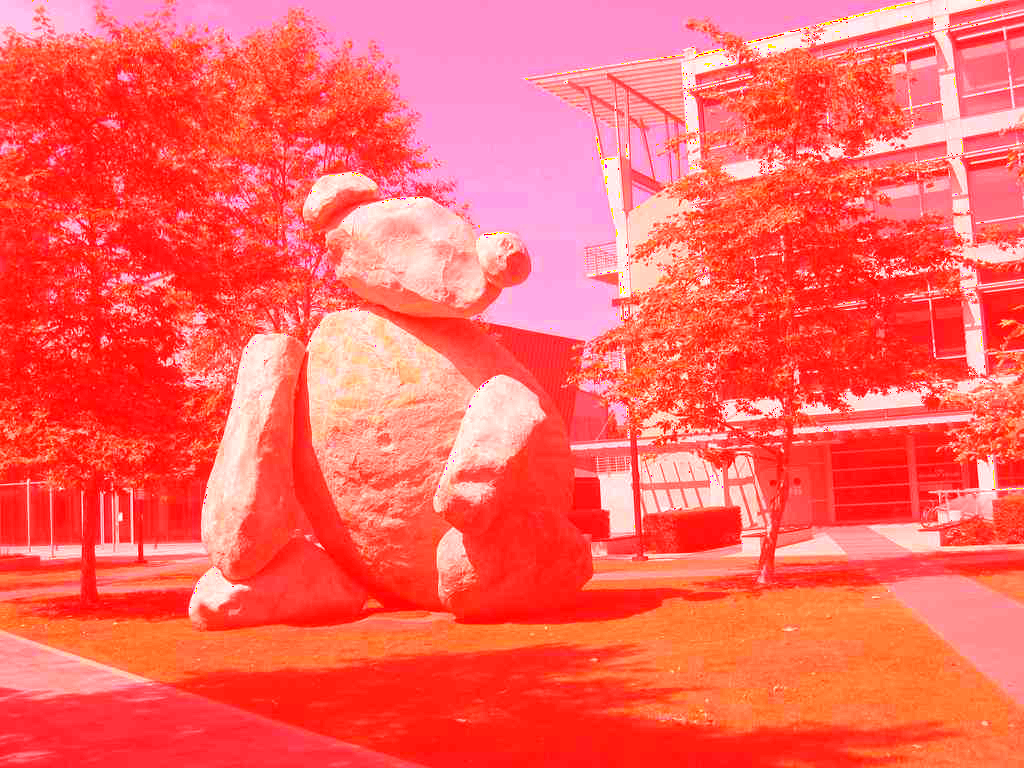

In [81]:
display(Image.fromarray(bearArrRed))

In [ ]:
# 4.3 let's take the best version of the bear image you can get... we want to keep it as and RGB image, 
# so same format, but I want to modify it such that it looks BW... how can we do it?

# *******************
# YOUR CODE HERE...  
BWBearArr = np.copy(bearArr)
for i in range(len(BWBearArr)):
    for j in range(len(BWBearArr[i])):
        print(BWBearArr[i][j])

[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[175 190 235]
[175 190 235]
[175 190 235]
[175 190 235]
[175 190 235]
[175 190 235]
[175 190 235]
[175 190 235]
[165 185 230]
[165 185 230]
[165 185 230]
[165 185 230]
[165 185 230]
[165 185 230]
[165 185 230]
[165 185 230]
[155 175 220]
[155 175 220]
[155 175 220]
[155 175 220]
[155 175 220]
[155 175 220]
[155 175 220]
[155 175 220]
[160 175   4]
[160 175   4]
[160 175 250]
[160 180 240]
[160 180 240]
[160 180 235]
[160 180 225]
[160 180 225]
[145 165 210]
[160 180 225]
[165 185 240]
[160 180 240]
[150 170 230]
[140 155 230]
[150 165 250]
[165 180   9]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 1

[135 170 220]
[135 170 220]
[135 170 220]
[130 165 215]
[125 160 210]
[125 160 210]
[130 165 215]
[130 165 215]
[130 165 215]
[125 160 210]
[120 155 205]
[115 150 200]
[130 155 185]
[120 145 175]
[110 135 165]
[110 130 175]
[120 140 185]
[115 150 200]
[110 145 195]
[105 135 195]
[100 140 195]
[105 145 210]
[105 140 220]
[100 145 220]
[ 95 140 215]
[ 90 135 220]
[ 85 130 215]
[ 85 130 215]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 150 195]
[ 85 1

[ 90 140 200]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 80 140 210]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 130 185]
[ 90 130 185]
[ 90 130 185]
[ 90 130 185]
[ 90 130 185]
[ 90 130 185]
[ 95 135 190]
[ 95 135 190]
[110 150 205]
[110 150 205]
[110 150 205]
[110 150 205]
[110 150 205]
[110 150 205]
[110 150 205]
[110 150 205]
[125 145 190]
[130 150 195]
[135 155 200]
[150 170 215]
[160 180 225]
[175 195 240]
[180 200 245]
[185 205 250]
[205 225  14]
[210 230  19]
[225 245  34]
[230 250  39]
[235 255  44]
[235 255  44]
[235 255  44]
[230 250  39]
[235 235 235]
[230 230 230]
[215 215 215]
[205 205 205]
[195 195 195]
[190 190 190]
[190 1

[105 135 195]
[105 140 190]
[100 135 175]
[100 135 165]
[100 135 165]
[ 90 130 145]
[ 95 130 160]
[100 135 165]
[105 140 170]
[110 145 185]
[115 150 200]
[115 150 200]
[115 150 200]
[ 80 130 190]
[ 85 135 195]
[ 90 140 200]
[ 95 145 205]
[100 150 210]
[100 150 210]
[100 150 210]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 90 140 200]
[ 90 140 200]
[ 95 145 205]
[100 150 210]
[100 150 210]
[105 155 215]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[110 160 220]
[115 165 225]
[110 160 220]
[110 160 220]
[110 160 220]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[220 220 220]
[230 230 230]
[235 235 235]
[240 240 240]
[240 240 240]
[235 235 235]
[225 225 225]
[215 215 215]
[215 215 215]
[225 225 225]
[230 230 230]
[225 225 225]
[220 220 220]
[230 230 230]
[230 230 230]
[230 230 230]
[235 235 235]
[235 235 235]
[235 235 235]
[240 240 240]
[240 240 240]
[235 245 240]
[225 235 230]
[215 225 220]
[215 225 220]
[225 235 230]
[230 240 235]
[230 240 235]
[225 235 230]
[230 240 235]
[230 240 235]
[230 240 235]
[230 240 235]
[230 240 235]
[230 240 235]
[230 240 235]
[230 240 235]
[225 235 230]
[225 235 230]
[225 235 230]
[225 235 230]
[225 235 230]
[225 235 230]
[225 235 230]
[225 235 230]
[220 230 225]
[220 230 225]
[220 230 225]
[220 230 225]
[220 230 225]
[220 230 225]
[220 230 225]
[220 230 225]
[215 225 210]
[210 220 205]
[200 210 195]
[185 195 180]
[170 180 165]
[155 165 150]
[140 150 135]
[130 140 125]
[65 75 60]
[65 75 60]
[65 75 60]
[70 80 65]
[70 80 65]
[70 80 65]
[70 80 65]
[75 85 70]
[80 85 95]
[75 80 90]
[70 75 85]
[60 65 75]
[50 55 65]
[45

[240 240 240]
[240 240 240]
[240 240 240]
[235 245 240]
[255   9   4]
[245 255 250]
[215 225 220]
[210 220 215]
[230 240 235]
[230 240 235]
[205 215 210]
[220 230 225]
[220 230 225]
[225 235 230]
[225 235 230]
[230 240 235]
[235 245 240]
[235 245 240]
[235 245 240]
[225 235 230]
[225 235 230]
[220 230 225]
[220 230 225]
[215 225 220]
[210 220 215]
[210 220 215]
[205 215 210]
[245 255 250]
[230 240 235]
[205 215 210]
[175 185 180]
[140 150 145]
[110 120 115]
[85 95 90]
[70 80 75]
[75 85 70]
[70 80 65]
[70 80 65]
[70 80 65]
[65 75 60]
[60 70 55]
[60 70 55]
[60 70 55]
[55 65 50]
[55 65 50]
[55 65 50]
[55 65 50]
[55 65 50]
[50 60 45]
[50 60 45]
[50 60 45]
[75 80 90]
[70 75 85]
[70 75 85]
[65 70 80]
[55 60 70]
[50 55 65]
[50 55 65]
[45 50 60]
[70 75 85]
[ 90  95 105]
[ 90  95 105]
[75 80 90]
[70 75 85]
[ 95 100 110]
[110 115 125]
[110 115 125]
[100 120 135]
[ 95 115 130]
[ 85 105 120]
[ 80 100 115]
[ 75  95 110]
[ 80 100 115]
[ 85 105 120]
[ 90 110 125]
[105 125 140]
[100 120 135]
[ 95 115 

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[105 135 135]
[110 140 140]
[105 135 135]
[ 90 120 120]
[65 95 95]
[60 90 90]
[ 80 110 110]
[100 130 130]
[140 170 170]
[135 165 165]
[115 145 145]
[ 90 120 120]
[ 90 120 120]
[110 140 140]
[125 155 155]
[125 155 155]
[105 155 215]
[ 90 140 200]
[ 75 125 185]
[ 65 115 175]
[ 65 115 175]
[ 80 130 190]
[100 150 210]
[110 160 220]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205

[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 140 200]
[ 90 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[205 225 240]
[210 230 245]
[215 235 250]
[210 230 245]
[180 200 215]
[135 155 170]
[ 90 110 125]
[60 80 95]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[180 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[175 195 240]
[185 205 210]
[180 200 205]
[170 190 195]
[155 175 180]
[150 170 175]
[150 170 175]
[160 180 185]
[165 185 190]
[120 140 145]
[ 80 100 105]
[70 90 95]
[115 135 140]
[165 185 190]
[180 200 205]
[175 195 200]
[175 195 200]
[175 190 215]
[175 190 215]
[170 185 210]
[170 185 210]
[170 185 210]
[175 190 215]
[180 195 220]
[185 200 225]
[175 190 215]
[175 190 215]
[175 190 215]
[175 190 215]
[175 190 215]
[175 190 215]
[175 190 215]
[175 190 215

[ 95 150 170]
[105 160 190]
[105 155 200]
[100 150 200]
[ 90 140 200]
[100 150 210]
[100 145 220]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 200]
[100 150 200]
[100 150 195]
[100 150 195]
[100 150 195]
[ 95 145 190]
[ 95 145 190]
[ 95 145 190]
[100 150 195]
[105 155 205]
[105 155 205]
[ 95 145 195]
[ 95 145 205]
[ 95 145 205]
[100 150 210]
[100 145 220]
[ 95 140 215]
[ 95 140 215]
[ 95 140 215]
[110 150 205]
[110 150 205]
[105 145 200]
[105 145 200]
[105 145 200]
[105 150 195]
[105 150 195]
[105 150 195]
[100 145 190]
[ 95 140 185]
[ 90 135 180]
[ 95 140 185]
[100 145 190]
[ 95 140 185]
[ 85 130 175]
[ 75 120 165]
[105 125 180]
[ 95 115 170]
[ 85 105 160]
[ 85 105 160]
[ 95 115 170]
[105 125 180]
[110 130 185]
[105 125 180]
[ 80 100 155]
[ 90 110 165]
[100 120 175]
[110 130 185]
[120 140 195]
[120 140 195]
[115 135 190]
[115 135 190]
[100 150 200]
[100 150 200]
[100 150 200]
[100 150 210]
[100 150 210]
[105 145 210]
[105 145 210]
[105 145 210]
[110 140 210]
[110 140 210]
[110 1

[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[160 180 225]
[155 175 220]
[155 175 220]
[145 165 210]
[140 160 205]
[130 150 195]
[125 145 190]
[115 135 130]
[ 95 115 110]
[75 95 90]
[65 85 80]
[65 85 80]
[70 90 95]
[70 90 95]
[70 90 95]
[ 95 115 130]
[105 125 140]
[110 130 145]
[110 130 145]
[105 120 145]
[105 120 145]
[110 125 150]
[120 135 160]
[120 170 180]
[ 90 135 160]
[ 60 105 130]
[ 50  95 130]
[ 70 115 160]
[ 95 135 190]
[105 145 210]
[110 145 225]
[105 140 220]
[105 140 220]
[105 140 220]
[105 145 210]
[105 145 210]
[105 145 200]
[105 145 200]
[105 145 200]
[105 145 200]
[105 145 200]
[105 145 200]
[100 140 195]
[100 140 195]
[105 145 200]
[105 145 200]
[110 150 205]
[115 160 205]
[110 155 200]
[105 150 195]
[100 145 190]
[100 145 190]
[105 150 195]
[110 155 200]
[115 160 205]
[ 95 125 195]
[100 130 200]
[105 135 205]
[110 140 200]
[115 145 205]
[115 145 205]
[110 145 195]
[110 145 195]
[110 145 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[110 115 125]
[110 115 125]
[100 105 115]
[115 120 130]
[165 170 180]
[210 215 225]
[230 235 245]
[230 235 245]
[230 235 245]
[225 230 240]
[225 230 240]
[220 225 235]
[215 220 230]
[215 220 230]
[215 220 230]
[200 200 200]
[220 220 220]
[210 210 210]
[240 240 240]
[39 39 39]
[14 14 14]
[220 225 235]
[245 250   4]
[215 220 230]
[190 210 225]
[170 190 205]
[150 170 185]
[125 145 160]
[100 125 145]
[ 85 110 130]
[ 75 100 120]
[ 80  85 105]
[ 90  95 115]
[110 115 135]
[135 140 160]
[165 170 190]
[195 200 220]
[215 220 240]
[230 235 255]
[210 215 235]
[215 220 240]
[215 220 240]
[205 210 230]
[185 190 210]
[145 150 170]
[110 115 135]
[ 85  90 110]
[45 65 70]
[35 55 60]
[25 45 50]
[20 40 45]
[15 35 40]
[25 45 50]
[35 55 60]
[40 60 65]
[50 70 75]
[45 65 70]
[40 60 65]
[40 60 65]
[35 55 60]
[40 60 65]
[40 60 65]
[45 65 70]
[60 65 75]
[55 60 70]
[55 60 70]
[50 55 65]
[50 55 65]
[55 60 70]
[55 60 70]
[60 65 75]
[45 50 60]
[70 75 85]
[100 105 115]
[125 130 140]
[130 135 145]
[125 130 140]
[120 1

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[235 235 235]
[235 235 235]
[235 235 235]
[240 240 240]
[240 240 240]
[240 240 240]
[240 240 240]
[235 235 235]
[230 230 230]
[215 215 215]
[205 205 205]
[190 190 190]
[170 170 170]
[145 145 145]
[125 125 125]
[105 105 105]
[100 100 100]
[65 65 65]
[65 65 65]
[65 65 65]
[65 65 65]
[65 65 65]
[70 70 70]
[70 70 70]
[70 70 70]
[60 65 75]
[60 65 75]
[65 70 80]
[60 65 75]
[60 65 75]
[55 60 70]
[50 55 65]
[45 50 60]
[65 70 80]
[60 65 75]
[60 65 75]
[55 60 70]
[60 65 75]
[65 70 80]
[75 80 90]
[80 85 95]
[ 70  95 115]
[ 75 100 120]
[ 75 100 120]
[ 80 105 125]
[ 85 110 130]
[ 90 115 135]
[ 95 120 140]
[ 95 120 140]
[100 125 145]
[ 95 120 140]
[ 95 120 140]
[ 90 115 135]
[ 90 115 135]
[ 90 115 135]
[ 95 120 140]
[100 125 145]
[ 85  90 100]
[105 110 120]
[110 115 125]
[105 110 120]
[125 130 140]
[180 185 195]
[230 235 245]
[250 255   9]
[240 245 255]
[235 240 250]
[220 225 235]
[205 210 220]
[190 195 205]
[170 175 185]
[160 165 175]
[155 160 170]
[125 125 125]
[105 105 105]
[145 145 145]
[155 155

[ 95 145 195]
[ 85 135 185]
[ 85 135 185]
[ 90 140 190]
[ 95 145 190]
[ 90 140 185]
[ 85 135 180]
[ 85 115 185]
[105 135 195]
[115 145 205]
[110 140 200]
[ 90 120 180]
[ 85 120 170]
[100 135 185]
[125 160 200]
[105 140 180]
[ 95 130 160]
[110 145 175]
[130 170 185]
[110 150 165]
[ 65 105 115]
[45 85 95]
[ 60 100 110]
[150 155 125]
[130 135 105]
[135 140 110]
[150 160 135]
[125 135 110]
[70 80 65]
[65 75 60]
[ 85 105 100]
[125 145 150]
[ 95 115 120]
[ 70  95 110]
[ 85 110 125]
[ 95 120 140]
[ 80 105 125]
[ 70  95 115]
[ 70  95 115]
[ 85 135 195]
[ 85 135 195]
[ 90 140 200]
[ 95 145 205]
[ 95 145 205]
[100 150 210]
[105 155 215]
[105 155 215]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[115 125 120]
[105 115 110]
[100 110 105]
[100 110 105]
[100 110 105]
[100 110 105]
[ 80 100  95]
[140 160 155]
[110 130 135]
[55 75 80]
[ 75  95 100]
[100 125 140]
[100 125 140]
[115 140 160]
[ 75 110 140]
[ 75 110 140]
[ 75 110 150]
[ 80 115 155]
[ 90 135 180]
[100 145 190]
[100 145 190]
[100 140 195]
[110 140 210]
[115 145 215]
[ 80 110 180]
[ 35  65 135]
[ 50  80 150]
[110 140 210]
[130 160 230]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[105 135 205]
[ 85 145 215]
[ 85 145 215]
[ 85 145 215]
[ 85 145 215]
[ 85 145 215]
[ 95 140 215]
[ 95 145 205]
[ 95 145 205]
[100 150 210]
[105 145 210]
[105 145 210]
[100 140 195]
[105 135 195]
[110 140 200]
[110 140 200]
[110 140 200]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 85 145 205]
[ 85 145 

[105 115 110]
[105 115 110]
[100 110 105]
[85 95 90]
[75 85 80]
[80 90 85]
[ 90 100  95]
[105 115 110]
[ 85 110 130]
[100 125 155]
[110 135 165]
[115 140 170]
[115 140 170]
[115 140 170]
[120 145 175]
[125 150 180]
[135 160 190]
[105 130 160]
[ 80 105 135]
[ 75 100 130]
[ 95 120 140]
[110 135 155]
[110 135 155]
[100 125 145]
[100 130 130]
[105 135 135]
[105 135 135]
[ 95 125 125]
[ 90 120 120]
[ 90 120 120]
[100 130 130]
[115 145 145]
[105 130 145]
[105 130 145]
[100 125 140]
[ 90 115 130]
[ 70  95 110]
[ 60  85 100]
[55 80 95]
[ 60  85 100]
[ 85 105 160]
[105 125 180]
[120 140 195]
[130 150 205]
[130 150 205]
[125 145 190]
[125 145 190]
[125 145 190]
[120 145 175]
[115 140 170]
[115 140 170]
[115 140 160]
[115 140 160]
[115 140 160]
[110 135 155]
[110 135 155]
[145 170 190]
[120 145 165]
[105 130 145]
[100 125 140]
[ 90 115 130]
[ 90 115 130]
[115 140 155]
[150 180 180]
[165 195 195]
[140 170 170]
[105 135 125]
[ 80 110 100]
[ 70 100  90]
[ 85 115 105]
[110 140 130]
[130 160 140]
[120

[175 190 215]
[175 195 210]
[175 195 210]
[175 195 210]
[175 195 210]
[175 195 200]
[170 190 195]
[145 165 170]
[110 130 125]
[ 85 105 100]
[ 80 100  95]
[ 85 105 100]
[ 95 115 110]
[100 120 115]
[55 75 70]
[50 70 65]
[45 65 60]
[60 80 75]
[ 85 105 100]
[110 130 135]
[125 145 150]
[130 150 155]
[185 205 210]
[170 190 205]
[150 170 185]
[125 145 160]
[110 125 150]
[100 115 140]
[100 115 140]
[100 115 140]
[110 130 135]
[110 130 135]
[115 135 140]
[120 140 145]
[125 145 150]
[130 150 155]
[135 155 160]
[135 155 160]
[100 120 125]
[ 85 105 110]
[120 140 145]
[140 160 165]
[115 135 140]
[140 160 165]
[180 200 205]
[165 185 190]
[140 150 145]
[140 150 145]
[130 140 135]
[110 120 115]
[ 90 100  95]
[ 90 100  95]
[110 120 115]
[130 140 135]
[140 150 145]
[110 120 115]
[120 130 125]
[170 180 175]
[175 185 180]
[140 150 145]
[135 145 140]
[175 185 180]
[105 125 130]
[105 125 130]
[100 120 125]
[ 90 110 115]
[ 90 110 115]
[110 130 135]
[145 165 170]
[180 200 205]
[185 205 210]
[130 150 155]
[ 85

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[ 90 110 105]
[65 90 60]
[ 75 100  70]
[ 90 115  85]
[ 95 120  90]
[ 75 100  80]
[70 95 75]
[120 145 125]
[185 205 200]
[150 170 165]
[150 170 165]
[120 140 135]
[ 75  95 100]
[65 85 90]
[ 95 115 120]
[135 155 160]
[150 170 175]
[ 95 105 100]
[115 125 120]
[130 140 135]
[125 135 130]
[100 110 105]
[65 75 70]
[30 40 35]
[15 25 20]
[45 55 50]
[85 95 90]
[ 95 105 100]
[80 90 85]
[100 110 105]
[140 150 145]
[110 120 115]
[35 45 40]
[50 65 30]
[60 75 40]
[ 90 105  70]
[125 140 105]
[125 140 105]
[ 95 110  75]
[80 95 60]
[ 85 100  65]
[60 75 40]
[50 65 30]
[55 70 35]
[75 90 55]
[105 120  85]
[130 145 110]
[130 145 110]
[120 135 100]
[75 95 90]
[ 95 115 110]
[115 135 130]
[110 130 125]
[ 85 105 100]
[65 85 80]
[70 90 85]
[ 85 105 100]
[ 85 105 100]
[ 80 100  95]
[ 95 115 110]
[115 135 130]
[110 130 125]
[ 90 110 105]
[ 95 115 110]
[115 135 130]
[110 115 135]
[105 110 130]
[110 115 135]
[125 130 140]
[145 150 160]
[140 145 155]
[120 130 125]
[ 95 105 100]
[70 80 65]
[105 115 100]
[140 150 125]

[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 145 205]
[ 95 1

[170 180 175]
[140 150 145]
[120 120 120]
[120 120 120]
[115 115 115]
[115 105 110]
[180 170 175]
[235 225 230]
[210 200 205]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[215 220 230]
[215 220 230]
[150 155 165]
[60 80 95]
[45 65 80]
[ 70  90 105]
[35 55 70]
[15 40 60]
[30 55 75]
[30 55 75]
[30 70 80]
[40 80 90]
[ 55  95 105]
[ 65 105 115]
[ 70 110 120]
[ 80 120 130]
[100 140 150]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 160]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[110 150 165]
[115 155 170]
[115 155 170]
[115 155 170]
[115 155 170]
[120 160 175]
[110 150 165]
[100 140 155]
[105 145 160]
[110 150 165]
[110 150 165]
[ 95 135 150]
[ 80 120 135]
[ 

[140 155 180]
[120 135 160]
[ 85 100 125]
[125 140 165]
[120 135 160]
[110 125 150]
[105 120 145]
[100 115 140]
[105 120 145]
[110 125 150]
[110 125 150]
[170 190 195]
[175 195 200]
[185 205 210]
[185 205 210]
[180 200 205]
[170 190 185]
[155 175 170]
[150 170 165]
[145 170 150]
[100 125 105]
[65 90 70]
[70 95 65]
[ 95 120  90]
[ 95 120  90]
[55 80 50]
[ 5 30  0]
[90 95 55]
[150 155 115]
[ 95 100  60]
[100 105  65]
[85 90 60]
[35 40 10]
[115 120  90]
[180 185 160]
[160 165 140]
[75 80 55]
[90 95 70]
[90 90 80]
[25 25 15]
[55 55 45]
[105 105  95]
[50 50 40]
[55 65 60]
[60 70 65]
[70 80 75]
[ 90 100  95]
[100 110 105]
[100 110 105]
[80 90 75]
[65 75 60]
[70 80 65]
[75 85 60]
[75 85 60]
[65 75 50]
[50 60 35]
[45 60 25]
[60 75 40]
[80 95 60]
[105 115 110]
[75 85 80]
[60 70 65]
[85 95 90]
[115 125 120]
[120 130 125]
[120 130 125]
[120 130 125]
[115 125 120]
[110 120 115]
[125 135 120]
[155 165 150]
[170 180 165]
[175 185 170]
[195 205 190]
[220 230 215]
[115 130  95]
[ 85 100  65]
[50 65 30

[220 220 220]
[180 180 180]
[150 150 150]
[160 160 160]
[210 210 210]
[220 220 220]
[160 160 170]
[110 110 120]
[125 125 135]
[180 180 190]
[215 215 225]
[110 110 120]
[165 165 175]
[185 185 195]
[60 60 70]
[35 35 35]
[70 70 70]
[15 15 15]
[55 55 45]
[65 65 55]
[75 75 65]
[75 75 65]
[60 65 40]
[70 75 50]
[110 115  90]
[150 155 130]
[160 165 140]
[135 135 125]
[145 145 135]
[140 140 130]
[115 115 105]
[95 95 85]
[125 125 115]
[180 180 170]
[230 230 220]
[155 155 145]
[170 170 160]
[190 190 180]
[185 185 175]
[170 170 160]
[165 165 155]
[180 180 170]
[195 195 185]
[160 165 135]
[130 135 105]
[100 105  75]
[100 105  75]
[115 120  90]
[120 125  95]
[ 95 100  70]
[65 70 40]
[70 75 45]
[100 105  75]
[135 140 110]
[145 150 120]
[125 130 100]
[110 115  85]
[110 115  85]
[115 120  90]
[80 85 55]
[ 95 100  70]
[100 105  75]
[ 95 100  70]
[90 95 65]
[90 95 65]
[90 95 65]
[ 95 100  70]
[85 90 60]
[75 80 50]
[125 130 100]
[75 80 50]
[60 65 35]
[ 95 100  70]
[55 60 30]
[70 75 45]
[70 75 35]
[85 90 6

[145 185 200]
[130 170 185]
[120 160 175]
[115 155 170]
[ 80 105 120]
[ 85 110 125]
[ 85 110 125]
[ 70  95 110]
[ 60  85 100]
[ 70  95 110]
[ 95 120 135]
[120 145 160]
[115 140 155]
[120 145 160]
[130 155 170]
[145 170 185]
[160 185 200]
[170 195 210]
[180 205 220]
[185 210 225]
[165 190 160]
[165 190 170]
[170 195 175]
[165 195 185]
[160 205 200]
[165 205 215]
[165 205 220]
[165 205 220]
[185 225 240]
[210 235 255]
[200 225 240]
[185 205 220]
[185 190 200]
[200 200 200]
[205 195 200]
[200 180 175]
[155 175 170]
[165 185 180]
[180 200 195]
[190 210 205]
[205 215 210]
[215 225 220]
[230 240 235]
[245 255 250]
[230 240 235]
[230 240 235]
[225 235 230]
[225 235 230]
[220 230 215]
[220 230 215]
[220 230 215]
[215 225 210]
[240 240 240]
[240 240 240]
[245 245 245]
[245 245 245]
[245 245 245]
[240 240 240]
[235 235 235]
[230 230 230]
[235 235 235]
[235 235 235]
[235 235 235]
[235 235 235]
[235 235 235]
[235 235 235]
[235 235 235]
[235 235 235]
[230 235 210]
[235 240 215]
[235 240 215]
[235 2

[175 175 165]
[200 200 200]
[180 180 180]
[155 155 155]
[140 140 140]
[80 80 90]
[10 10 20]
[25 25 35]
[130 130 140]
[195 190 215]
[155 150 175]
[110 105 130]
[130 125 150]
[175 170 195]
[195 190 220]
[160 170 165]
[110 120 115]
[70 80 75]
[60 70 65]
[50 60 55]
[20 30 25]
[20 30 15]
[40 50 35]
[130 140 125]
[105 115  90]
[85 95 70]
[75 85 60]
[60 70 45]
[50 65 30]
[45 60 25]
[55 70 35]
[100 105 125]
[80 85 95]
[70 75 85]
[80 85 95]
[80 90 85]
[70 80 65]
[75 85 70]
[ 95 105  80]
[35 50 15]
[75 90 45]
[110 125  70]
[105 120  65]
[75 95 25]
[50 70  0]
[60 80  5]
[75 95 20]
[30 35 45]
[55 60 70]
[75 80 90]
[ 85  90 100]
[105 110 120]
[120 125 135]
[105 110 130]
[ 80  85 105]
[ 85  90 110]
[140 145 170]
[ 95 100 125]
[60 65 90]
[125 130 155]
[125 130 155]
[115 115 155]
[185 185 225]
[155 195 210]
[160 200 215]
[160 200 215]
[160 200 215]
[160 200 215]
[160 200 215]
[160 200 215]
[160 200 215]
[140 180 195]
[140 180 195]
[140 180 195]
[140 180 195]
[145 185 200]
[145 185 200]
[145 185 200]
[

[105 110 120]
[105 110 120]
[110 160 115]
[ 95 145 100]
[ 80 125 100]
[ 75 120 105]
[ 55  95 105]
[ 50  90 105]
[ 80 115 155]
[120 155 205]
[120 150 210]
[120 150 210]
[105 135 195]
[100 130 190]
[120 155 205]
[135 170 220]
[115 150 190]
[ 75 110 150]
[100 120 175]
[115 135 190]
[130 150 205]
[105 140 190]
[ 55  90 140]
[ 25  55 115]
[ 60  90 150]
[115 155 210]
[105 145 200]
[105 145 210]
[100 150 210]
[100 150 210]
[100 145 220]
[100 145 220]
[100 145 220]
[100 145 220]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 1

[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 1

[145 175 175]
[145 175 175]
[145 175 175]
[145 175 175]
[145 175 175]
[145 175 175]
[135 180 175]
[135 180 175]
[135 180 175]
[145 175 175]
[145 175 175]
[145 175 175]
[145 175 175]
[150 170 175]
[140 160 165]
[150 170 175]
[215 235 240]
[250 255   9]
[215 220 230]
[215 220 230]
[240 245 255]
[225 230 240]
[240 240 240]
[215 215 215]
[245 245 245]
[255 255 255]
[210 210 210]
[210 210 210]
[240 240 240]
[230 230 230]
[250 250 250]
[240 240 240]
[235 235 235]
[240 240 240]
[240 240 240]
[225 225 225]
[195 195 195]
[170 170 170]
[130 140 115]
[120 130 105]
[100 110  85]
[85 95 70]
[75 85 60]
[75 85 60]
[75 85 60]
[80 90 65]
[70 80 55]
[65 75 50]
[55 65 40]
[50 60 35]
[55 65 40]
[70 80 55]
[85 95 70]
[100 110  85]
[65 75 60]
[75 85 70]
[ 90 100  85]
[ 90 100  85]
[85 95 80]
[75 85 70]
[75 85 80]
[80 90 85]
[ 95 105 100]
[ 95 100 110]
[ 95 100 110]
[ 95 100 110]
[100 105 115]
[110 115 135]
[120 125 145]
[125 130 150]
[100 105 130]
[100 105 130]
[ 80  85 110]
[45 50 75]
[55 60 85]
[ 95 100 1

[35 45 20]
[60 70 45]
[75 85 60]
[70 80 55]
[70 80 55]
[80 90 65]
[65 75 50]
[70 80 55]
[75 85 60]
[80 90 65]
[75 85 60]
[70 80 55]
[65 75 50]
[60 70 45]
[40 50 25]
[45 55 30]
[55 65 40]
[70 80 55]
[85 95 70]
[85 95 70]
[80 90 65]
[70 80 55]
[ 90 100  85]
[ 95 105  90]
[ 95 105  90]
[75 85 70]
[45 55 40]
[35 45 30]
[40 50 35]
[55 65 50]
[ 90 100  85]
[80 90 75]
[70 80 65]
[60 70 55]
[55 65 50]
[50 60 45]
[55 65 50]
[55 65 50]
[35 45 30]
[65 75 70]
[45 55 50]
[30 35 45]
[70 75 95]
[ 80  85 110]
[ 90  95 120]
[140 140 180]
[100 100 140]
[115 120 145]
[125 130 150]
[115 120 130]
[ 95 105 100]
[75 85 70]
[70 80 65]
[70 80 55]
[ 55 100  95]
[ 80 125 120]
[ 70 115 110]
[45 75 75]
[35 65 65]
[50 80 80]
[40 70 60]
[15 35 30]
[50 70 65]
[70 95 75]
[55 80 60]
[30 40 25]
[45 55 40]
[ 90 100  85]
[100 110  85]
[70 80 55]
[65 80 45]
[70 85 50]
[75 90 55]
[70 85 50]
[60 75 40]
[65 80 45]
[80 95 60]
[ 95 110  75]
[60 75 40]
[ 85 100  65]
[100 115  80]
[ 95 110  75]
[100 115  80]
[115 130  95]
[110 12

[85 95 90]
[115 125 120]
[120 130 125]
[ 90 100  95]
[45 55 50]
[10 20 15]
[0 5 0]
[25 35 20]
[25 35 20]
[20 30 15]
[20 30 15]
[25 35 20]
[30 40 25]
[40 50 35]
[50 60 45]
[25 35 20]
[35 45 30]
[40 50 35]
[25 35 20]
[15 25 10]
[15 25 10]
[40 50 35]
[65 75 60]
[135 145 140]
[100 110 105]
[120 130 125]
[135 145 140]
[115 125 120]
[125 135 130]
[135 145 130]
[100 110  95]
[40 50 35]
[35 45 20]
[50 60 35]
[80 90 65]
[85 95 70]
[ 90 105  70]
[125 140 105]
[180 195 160]
[160 165 140]
[110 115  90]
[90 95 70]
[75 80 55]
[65 70 45]
[120 125 100]
[150 155 130]
[105 110  85]
[80 85 60]
[80 85 60]
[75 80 55]
[65 70 45]
[55 60 35]
[55 60 35]
[70 75 50]
[85 90 65]
[125 135 110]
[125 135 120]
[110 120 105]
[105 115 110]
[130 135 145]
[155 160 180]
[125 130 150]
[65 70 95]
[100 105 130]
[135 140 160]
[70 75 95]
[35 40 50]
[100 110 105]
[ 90 100  85]
[60 70 55]
[120 130 105]
[135 150 115]
[80 95 60]
[50 65 30]
[65 80 45]
[60 75 40]
[30 45 10]
[45 60 25]
[ 95 110  75]
[75 90 55]
[ 85 100  65]
[ 90 105  

[100 125 140]
[110 135 150]
[105 130 145]
[100 125 140]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 95 120 135]
[ 85 120 150]
[ 85 120 150]
[ 85 120 150]
[ 95 120 140]
[ 95 120 140]
[ 95 120 140]
[ 95 120 140]
[100 120 135]
[110 130 145]
[ 90 110 125]
[100 120 135]
[165 170 180]
[215 220 230]
[225 230 240]
[215 220 230]
[210 215 225]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 220]
[220 220 230]
[220 220 230]
[225 225 235]
[215 210 235]
[240 235   4]
[215 210 235]
[125 120 145]
[ 95  90 120]
[115 110 140]
[105 100 130]
[ 85 110 125]
[ 85 110 125]
[ 90 115 130]
[105 130 145]
[125 150 165]
[135 160 175]
[130 155 170]
[125 150 165]
[110 135 150]
[ 95 120 135]
[ 85 110 125]
[ 80 105 120]
[ 85 110 125]
[ 85 110 125]
[ 80 105 120]
[ 75 100 115]
[ 55 105 115]
[ 55 105 115]
[ 55 105 115]
[ 55 105 115]
[ 60 110 120]
[ 60 110 120]
[ 65 115 125]
[ 65 115 125]
[ 55 105 115]
[ 60 110 120]
[ 60 1

[100 105 125]
[115 130 155]
[125 140 165]
[115 130 165]
[105 120 155]
[120 140 185]
[115 135 180]
[ 80 100 155]
[ 50  70 125]
[ 60  95 145]
[ 95 130 180]
[115 150 200]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 1

[195 220 240]
[215 240   4]
[220 245   9]
[215 240   4]
[210 235 255]
[195 220 235]
[145 170 185]
[175 200 215]
[215 240 255]
[145 170 185]
[ 65  90 105]
[55 80 95]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[ 60  85 100]
[80 85 60]
[75 80 55]
[75 80 55]
[75 80 55]
[80 85 60]
[70 75 50]
[55 60 35]
[40 45 20]
[45 50 25]
[40 45 20]
[45 50 25]
[60 65 40]
[85 90 65]
[85 90 65]
[55 60 35]
[30 35 10]
[30 40 15]
[30 40 15]
[35 45 20]
[45 55 30]
[55 65 40]
[65 75 50]
[75 85 60]
[80 90 65]
[60 70 45]
[50 60 35]
[40 50 25]
[35 45 20]
[40 50 25]
[40 50 25]
[35 45 20]
[25 35 10]
[50 50 40]
[40 40 30]
[30 30 20]
[35 35 25]
[45 45 35]
[55 55 45]
[55 55 45]
[55 55 45]
[40 40 30]
[35 35 25]
[35 35 25]
[35 35 25]
[40 40 30]
[45 45 35]
[50 50 40]
[50 50 40]
[30 30 20]
[30 30 20]
[30 30 20]
[30 30 20]
[35 35 25]
[40 40 30]
[50 50 40]
[55 55 45]
[85 85 75]
[105 105  95]
[70 70 60]
[35 35 25]
[45 45 35]
[30 30 20]
[20 20 10]
[55 55 45]
[5

[40 40 30]
[70 70 60]
[75 75 65]
[75 75 65]
[65 65 55]
[50 50 40]
[35 35 25]
[30 30 20]
[25 25 15]
[45 45 35]
[25 25 15]
[85 85 75]
[70 70 60]
[80 80 70]
[105 105  95]
[60 60 50]
[85 85 75]
[55 60 35]
[50 55 30]
[55 60 35]
[60 65 40]
[55 60 35]
[45 50 25]
[75 80 55]
[115 120  95]
[90 95 70]
[ 95 100  75]
[65 70 45]
[30 35 10]
[45 50 25]
[ 95 100  75]
[85 90 65]
[40 45 20]
[70 75 50]
[45 50 25]
[65 70 45]
[115 120  95]
[110 115  90]
[60 65 40]
[60 65 40]
[110 115  90]
[110 115  90]
[75 80 55]
[75 80 55]
[115 120  95]
[120 125 100]
[90 95 70]
[75 80 55]
[100 105  80]
[ 90 100  85]
[100 110  95]
[85 95 80]
[45 55 40]
[25 35 20]
[45 55 40]
[70 80 65]
[80 90 75]
[30 40 25]
[55 65 50]
[40 50 35]
[10 20  5]
[25 35 20]
[75 85 70]
[85 95 80]
[55 65 50]
[125 125 115]
[115 115 105]
[80 80 70]
[60 60 50]
[80 80 70]
[105 105  95]
[80 90 75]
[35 45 30]
[50 60 45]
[30 55 35]
[20 45 25]
[20 45 25]
[35 60 40]
[50 80 60]
[ 70 100  80]
[ 85 115  95]
[130 150 165]
[105 125 140]
[ 80 100 115]
[ 75  95 110]

[20 30  5]
[30 40 15]
[40 50 25]
[50 60 35]
[50 60 35]
[20 30  5]
[30 40 15]
[35 45 20]
[35 45 20]
[30 40 15]
[30 40 15]
[40 50 25]
[50 60 35]
[ 85  75 180]
[105 100 190]
[125 120 210]
[135 130 210]
[115 110 180]
[ 85  85 145]
[50 50 90]
[35 40 65]
[20 25 35]
[60 70 65]
[85 95 80]
[70 85 50]
[45 60 15]
[50 65 10]
[75 90 35]
[100 115  60]
[85 90 60]
[105 110  80]
[120 125  95]
[110 115  85]
[85 90 60]
[75 80 50]
[90 95 65]
[110 115  85]
[60 65 35]
[75 80 50]
[85 90 60]
[85 90 60]
[75 80 50]
[75 80 50]
[90 95 65]
[105 110  80]
[80 90 65]
[40 50 25]
[15 25  0]
[35 45 20]
[55 65 40]
[55 65 40]
[50 60 35]
[55 65 40]
[75 85 60]
[ 95 105  80]
[120 130 105]
[125 135 110]
[ 90 100  75]
[45 55 30]
[45 55 30]
[75 85 60]
[70 80 55]
[ 90 100  75]
[100 110  85]
[ 90 100  75]
[100 110  85]
[115 125 100]
[ 95 105  80]
[55 65 40]
[125 135 110]
[100 110  85]
[70 80 55]
[65 75 50]
[80 90 65]
[ 95 105  80]
[ 95 105  80]
[ 90 100  75]
[115 135  65]
[100 120  50]
[100 115  60]
[120 135  90]
[145 160 115]
[1

[70 75 50]
[65 70 45]
[60 65 40]
[65 70 45]
[75 80 55]
[85 90 65]
[65 70 30]
[115 120  80]
[150 155 115]
[135 140 100]
[100 105  65]
[90 95 55]
[90 95 55]
[90 95 55]
[75 80 40]
[85 90 50]
[90 95 55]
[90 95 55]
[80 85 45]
[80 85 45]
[85 90 50]
[90 95 55]
[ 90 100  75]
[ 90 100  75]
[85 95 70]
[80 90 75]
[80 90 75]
[ 80 100  95]
[105 125 120]
[125 145 150]
[70 90 95]
[30 55 70]
[30 55 75]
[ 65  90 110]
[ 85 110 140]
[ 65 100 130]
[ 70 105 135]
[ 95 130 160]
[120 140 200]
[120 140 200]
[120 140 200]
[120 140 200]
[120 140 200]
[115 145 205]
[125 155 215]
[125 155 215]
[105 145 200]
[105 145 200]
[105 145 200]
[100 150 200]
[100 150 200]
[100 150 200]
[100 150 200]
[100 150 200]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150 210]
[100 150

[45 45 35]
[45 45 35]
[45 45 35]
[45 45 35]
[40 40 30]
[35 35 25]
[30 30 20]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[25 25 15]
[20 20 10]
[30 30 20]
[35 35 25]
[35 35 25]
[25 25 15]
[20 20 10]
[20 20 10]
[25 25 15]
[30 30 20]
[40 40 30]
[50 50 40]
[50 50 40]
[45 45 35]
[45 45 35]
[55 55 45]
[60 60 50]
[45 45 35]
[50 50 40]
[55 55 45]
[50 50 40]
[40 40 30]
[35 35 25]
[40 40 30]
[45 45 35]
[50 50 40]
[30 30 20]
[20 20 10]
[30 30 20]
[30 30 20]
[20 20 10]
[30 30 20]
[50 50 40]
[50 50 40]
[45 45 35]
[40 40 30]
[30 30 20]
[25 25 15]
[25 25 15]
[20 20 10]
[20 20 10]
[10 10  0]
[30 30 20]
[60 60 50]
[65 65 55]
[55 55 45]
[40 40 30]
[40 40 30]
[45 45 35]
[50 50 40]
[65 65 55]
[75 75 65]
[60 60 50]
[40 40 30]
[45 45 35]
[75 75 65]
[105 105  95]
[25 25 15]
[25 25 15]
[30 30 20]
[30 30 20]
[30 30 20]
[30 30 20]
[25 25 15]
[25 25 15]
[10 10  0]
[15 15  5]
[15 15  5]
[20 20 10]
[25 25 15]
[30 30 20]
[30 30 20]
[35 35 25]
[50 50 40]
[50 50 40]
[45 45 

[65 65 55]
[65 65 55]
[55 55 45]
[40 40 30]
[30 30 20]
[25 25 15]
[25 25 15]
[75 75 65]
[120 120 110]
[115 115 105]
[70 70 60]
[30 30 20]
[20 20 10]
[30 30 20]
[30 30 20]
[20 20 10]
[10 10  0]
[15 15  5]
[35 35 25]
[40 40 30]
[30 30 20]
[15 15  5]
[35 35 25]
[30 30 20]
[25 25 15]
[20 20 10]
[20 20 10]
[20 20 10]
[20 20 10]
[25 25 15]
[20 20 10]
[25 25 15]
[30 30 20]
[35 35 25]
[35 35 25]
[35 35 25]
[35 35 25]
[30 30 20]
[30 30 20]
[45 45 35]
[55 55 45]
[50 50 40]
[30 30 20]
[20 20 10]
[25 25 15]
[30 30 20]
[40 40 30]
[35 35 25]
[35 35 25]
[40 40 30]
[50 50 40]
[50 50 40]
[40 40 30]
[30 30 20]
[40 40 30]
[55 55 45]
[50 50 40]
[20 20 10]
[10 10  0]
[25 25 15]
[40 40 30]
[35 35 25]
[35 35 25]
[25 25 15]
[20 20 10]
[15 15  5]
[20 20 10]
[40 40 30]
[55 55 45]
[70 70 60]
[40 40 30]
[30 30 20]
[20 20 10]
[30 30 20]
[50 50 40]
[60 60 50]
[55 55 45]
[45 45 35]
[25 25 15]
[5 5 0]
[5 5 0]
[30 30 20]
[35 35 25]
[30 30 20]
[55 55 45]
[100 100  90]
[45 45 35]
[15 15  5]
[35 35 25]
[40 40 30]
[10 10 

[70 75 50]
[60 65 40]
[35 40 15]
[35 40 15]
[50 55 30]
[50 55 30]
[30 35 10]
[45 50 25]
[30 35 10]
[20 25  0]
[30 35 10]
[50 55 30]
[55 60 35]
[50 55 30]
[35 40 15]
[25 25 15]
[10 10  0]
[35 35 25]
[35 35 25]
[10 10  0]
[35 35 25]
[50 50 40]
[0 0 0]
[15 15  5]
[25 25 15]
[35 35 25]
[40 40 30]
[35 35 25]
[25 25 15]
[20 20 10]
[15 15  5]
[30 30 20]
[20 20 10]
[10 10  0]
[5 5 0]
[15 15  5]
[35 35 25]
[55 55 45]
[70 70 60]
[55 55 45]
[50 50 40]
[45 45 35]
[40 40 30]
[35 35 25]
[25 25 15]
[15 15  5]
[10 10  0]
[25 25 25]
[25 25 25]
[25 25 25]
[25 25 25]
[30 30 30]
[35 35 35]
[45 45 45]
[50 50 50]
[80 80 80]
[85 85 85]
[75 75 75]
[40 40 40]
[30 30 30]
[50 50 50]
[70 70 70]
[75 75 75]
[80 80 70]
[90 90 80]
[55 55 45]
[50 50 40]
[95 95 85]
[85 85 75]
[35 35 25]
[30 30 20]
[40 40 30]
[50 50 40]
[60 60 50]
[60 60 50]
[55 55 45]
[55 55 45]
[60 60 50]
[70 70 60]
[65 65 55]
[75 75 65]
[85 85 75]
[75 75 65]
[50 50 40]
[40 40 30]
[40 40 30]
[50 50 40]
[35 35 25]
[50 50 40]
[55 55 45]
[45 45 35]
[25 2

[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 1

[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 155 215]
[105 1

[155 155 145]
[155 155 145]
[200 200 190]
[135 135 125]
[80 80 70]
[80 80 70]
[80 80 70]
[40 40 30]
[40 40 30]
[70 70 60]
[65 65 55]
[70 75 45]
[ 95 100  70]
[115 120  90]
[120 125  95]
[100 105  75]
[80 85 55]
[70 75 45]
[70 75 45]
[130 135 105]
[130 135 105]
[100 105  75]
[ 95 100  70]
[140 145 115]
[170 175 145]
[140 145 115]
[100 105  75]
[135 150 115]
[140 155 120]
[ 95 110  75]
[85 95 70]
[145 155 130]
[150 160 135]
[ 95 105  80]
[70 80 65]
[115 125 110]
[130 140 125]
[155 165 160]
[165 175 170]
[135 145 140]
[ 95 105 100]
[ 90 100  95]
[115 125 120]
[140 160 155]
[120 140 135]
[110 130 125]
[115 135 130]
[120 140 135]
[105 125 120]
[ 95 115 110]
[100 120 115]
[ 85 105 100]
[ 95 115 110]
[105 125 120]
[105 125 120]
[ 90 110 105]
[ 80 100  95]
[ 85 105 100]
[ 90 110 105]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 85 115 115]
[ 80 110 110]
[105 135 135]
[ 95 125 125]
[ 90 120 120]
[110 140 140]
[ 95 125 125]
[115 145 145]
[19

[35 35 25]
[35 35 25]
[30 30 20]
[30 30 20]
[30 30 20]
[65 70 45]
[85 90 65]
[80 85 60]
[45 50 25]
[35 40 15]
[55 60 35]
[70 75 50]
[60 65 40]
[50 55 30]
[50 55 30]
[40 45 20]
[30 35 10]
[20 25  0]
[30 35 10]
[45 50 25]
[60 65 40]
[75 80 55]
[75 80 55]
[70 75 50]
[75 80 55]
[75 80 55]
[65 70 45]
[45 50 25]
[30 35 10]
[70 75 50]
[45 50 25]
[45 50 25]
[85 90 65]
[105 110  85]
[ 95 100  75]
[ 95 100  75]
[115 120  95]
[65 80 35]
[80 95 50]
[ 95 110  65]
[110 125  80]
[115 130  95]
[110 125  90]
[100 115  80]
[ 90 100  75]
[70 80 55]
[50 60 35]
[45 55 40]
[65 75 60]
[80 90 75]
[75 85 70]
[70 80 75]
[65 75 70]
[75 75 65]
[80 80 70]
[70 70 60]
[45 45 35]
[25 25 15]
[25 25 15]
[35 35 25]
[40 40 30]
[30 30 20]
[35 35 25]
[35 35 25]
[40 40 30]
[45 45 35]
[45 45 35]
[50 50 40]
[50 50 40]
[55 65 50]
[35 45 30]
[ 90 100  85]
[ 95 105  90]
[55 65 50]
[110 120 105]
[145 155 140]
[55 65 50]
[40 50 35]
[40 50 35]
[40 50 35]
[35 45 30]
[35 45 30]
[40 50 35]
[40 50 35]
[40 50 35]
[45 50 25]
[30 35 10]
[

[130 150 155]
[105 125 130]
[105 125 130]
[100 120 125]
[ 85 105 110]
[60 80 85]
[55 75 80]
[65 85 90]
[ 85 105 110]
[ 95 115 120]
[100 125 105]
[60 85 65]
[50 75 55]
[ 90 110 105]
[130 150 145]
[140 160 165]
[140 160 165]
[145 165 180]
[155 175 190]
[155 170 195]
[160 175 210]
[165 180 215]
[170 185 230]
[165 180 225]
[165 180 225]
[165 180 225]
[145 180 210]
[140 175 205]
[140 175 205]
[135 170 200]
[130 165 195]
[130 165 195]
[125 160 190]
[125 160 190]
[120 155 185]
[ 75 110 140]
[ 40  75 105]
[ 55  90 120]
[ 95 130 160]
[120 155 185]
[115 150 180]
[100 135 165]
[110 125 150]
[130 145 170]
[ 70  85 110]
[ 85 100 125]
[ 80  95 120]
[55 70 95]
[115 130 155]
[100 115 140]
[ 85 100 125]
[50 65 90]
[55 70 95]
[ 70  85 110]
[ 85 100 125]
[170 185 210]
[230 245  14]
[205 220 245]
[230 230 230]
[230 230 230]
[230 230 230]
[230 230 230]
[230 230 230]
[230 230 230]
[230 230 240]
[230 230 240]
[235 235 245]
[220 215 240]
[205 200 225]
[65 60 85]
[ 90  85 110]
[ 75  70 100]
[105 100 130]
[35 3

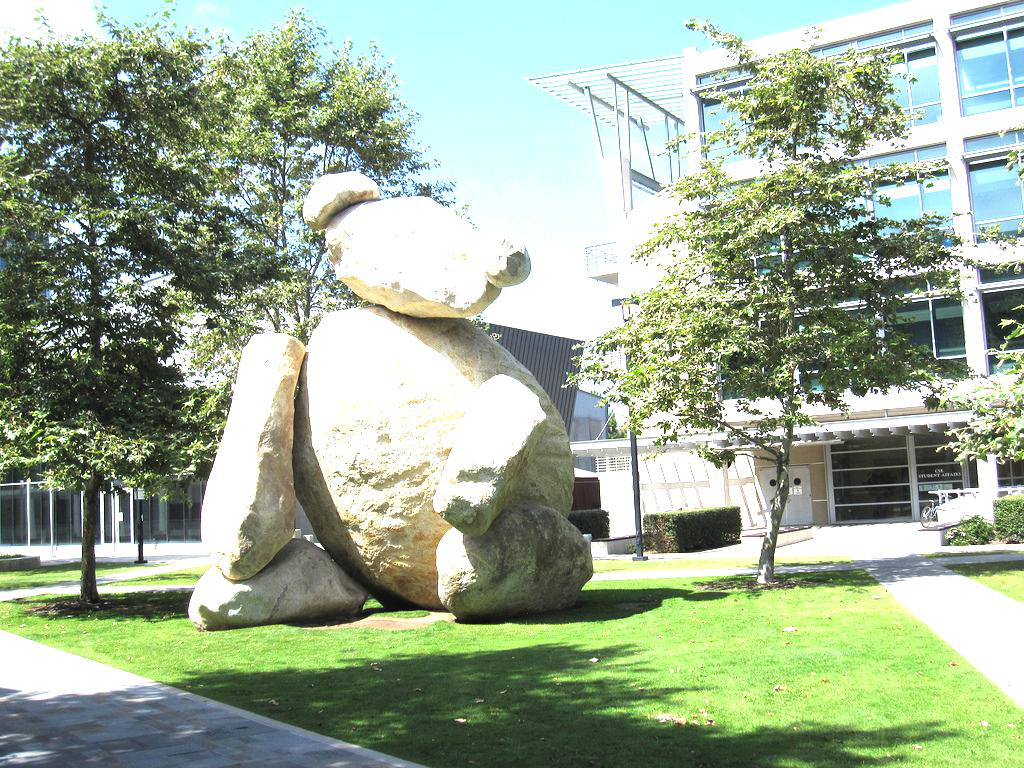

In [26]:
# 4.4 we have also a very bright image of the bear:

# Can we fix it?
bear = Image.open('data/bear_BRIGHT.jpg')
display(bear)